In [1]:
import xarray as xr
import sacpy as scp
import matplotlib.pyplot as plt
import numpy as np

In [2]:
sst = xr.open_dataset("../DATA/HadISST_sst_2x2.nc")['sst']
sst = xr.where(np.abs(sst)>100,np.NAN,sst)

ssta = sst.groupby("time.month") - sst.groupby("time.month").mean()
sstas = ssta.loc[:,-30:30,120:280]
# sstas[0].plot()

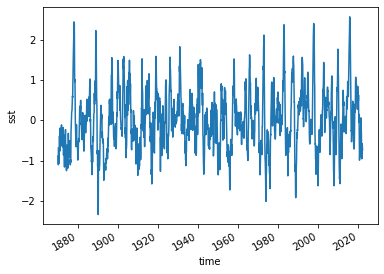

In [3]:
nino34 = ssta.loc[:,-5:5,190:240].mean(("lat","lon"))
nino34.plot()

In [4]:
nino34DJF = scp.spec_moth_yrmean(nino34,months=[12,1,2])
nino34DJF

<xarray.DataArray 'sst' (time: 152)>
array([-0.4778775 , -0.5731296 , -0.83789784, -0.84108686, -0.6759489 ,
       -0.89349574,  0.3716632 ,  2.404894  , -0.40999374, -0.8374243 ,
        0.27303287, -0.3945    , -0.4946613 , -0.05376929,  0.28707796,
        0.403676  , -0.97176427,  0.34457242,  1.6926035 , -1.8241453 ,
       -0.40437785, -0.2244959 , -1.1238469 , -1.0111815 , -0.5090721 ,
        0.26984006,  1.3795723 , -0.43530083, -0.67098856,  1.3919066 ,
        0.6092115 , -0.28946847,  1.2151691 , -0.7735979 ,  0.7880001 ,
        0.9345231 , -0.44221368, -0.05437604, -0.7052503 , -0.82594734,
       -0.5449558 ,  1.1133174 , -0.11574125,  0.78651667,  0.7607813 ,
       -0.25922415, -1.3831587 , -0.7395201 ,  1.3641114 ,  0.5520372 ,
        0.01142595, -0.3064761 , -0.49650708,  0.7035332 , -0.6566604 ,
        1.4495159 ,  0.09897729,  0.35328627, -0.03990109,  0.49487436,
        1.420818  , -0.22651438, -0.17560925, -0.9164341 , -0.19516699,
        0.42692447,  0.26530692,  0.12766032, -0.72613674,  0.89466876,
        1.3919033 ,  0.84574   , -1.1082911 , -0.16871254, -0.27863863,
       -0.34692863,  0.15460183,  0.23177652,  0.09490465, -1.1267239 ,
       -0.89103055,  0.4789996 ,  0.07415036,  0.27247843, -0.7009434 ,
       -1.1732787 , -0.3913982 ,  1.3429755 ,  0.4512917 , -0.06585561,
        0.01645524, -0.20471002, -0.3012021 ,  0.78082305, -0.5925217 ,
        1.1447831 , -0.36729074, -0.48655996,  0.90714   ,  0.56569654,
       -1.2037321 , -0.511358  ,  1.5886098 , -1.765563  , -0.46747506,
       -1.410461  ,  0.69293374,  0.7677911 ,  0.0991883 ,  0.5621203 ,
       -0.11436119,  0.04561065,  2.2622192 , -0.5838335 , -0.976083  ,
       -0.50084335,  1.1058766 ,  0.7744221 , -1.6104053 ,  0.12602606,
        0.42933464,  1.5513538 ,  0.31873024,  0.13355577,  1.0622284 ,
       -0.55210346, -0.29214033,  2.20424   , -1.3043454 , -1.4839292 ,
       -0.6979502 , -0.14260069,  1.0214895 ,  0.31485555,  0.5639203 ,
       -0.699367  ,  0.6419842 , -1.5411547 , -0.744775  ,  1.4586531 ,
       -1.419135  , -0.762203  , -0.20634937, -0.21411152,  0.6946842 ,
        2.3498762 , -0.15622886, -0.67271423,  0.7316511 ,  0.59871197,
       -0.8691499 , -0.7342178 ], dtype=float32)
Coordinates:
  * time     (time) int64 1870 1871 1872 1873 1874 ... 2017 2018 2019 2020 2021
    month    (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [5]:
nino34

<xarray.DataArray 'sst' (time: 1828)>
array([-0.8886412 , -1.1056482 , -0.6802754 , ..., -0.5877272 ,
       -0.67572707, -0.74191606], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4

In [10]:
std = nino34DJF.std()
nino34_label = nino34DJF > 0.8*std
years = nino34DJF[nino34_label].time
years

<xarray.DataArray 'time' (time: 33)>
array([1877, 1888, 1896, 1899, 1902, 1904, 1905, 1911, 1913, 1914, 1918, 1923,
       1925, 1930, 1939, 1940, 1941, 1957, 1963, 1965, 1968, 1972, 1977, 1982,
       1986, 1987, 1991, 1994, 1997, 2002, 2009, 2015, 2018])
Coordinates:
  * time     (time) int64 1877 1888 1896 1899 1902 ... 1997 2002 2009 2015 2018
    month    (time) int64 12 12 12 12 12 12 12 12 12 ... 12 12 12 12 12 12 12 12

In [12]:
time_label = sstas.time.dt.year.isin(years)
time_label

<xarray.DataArray 'year' (time: 1828)>
array([False, False, False, ..., False, False, False])
Coordinates:
  * time     (time) datetime64[ns] 1870-01-16T12:00:00 ... 2022-04-16T12:00:00
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 6 7 8 9 10 11 12 1 2 3 4

In [13]:
sp_data = sstas[time_label]
sp_data

<xarray.DataArray 'sst' (time: 396, lat: 30, lon: 81)>
array([[[        nan,         nan,         nan, ...,  1.0653305 ,
          1.3120613 ,  1.4098835 ],
        [        nan,         nan,         nan, ...,  1.1992531 ,
          1.3882065 ,  1.4948463 ],
        [        nan,         nan,         nan, ...,  1.5751095 ,
          1.514431  ,  1.5031967 ],
        ...,
        [-0.71299744, -0.79112625, -0.75444984, ..., -0.07579613,
          0.23407555,  0.30203247],
        [        nan, -0.6008358 , -0.73408127, ..., -0.13559914,
                 nan,         nan],
        [        nan, -0.51266193, -0.6738405 , ...,  0.04809189,
                 nan,  0.20022392]],

       [[        nan,         nan,         nan, ...,  1.4591999 ,
          1.6780415 ,  1.7474232 ],
        [        nan,         nan,         nan, ...,  1.5682735 ,
          1.7296467 ,  1.7913609 ],
        [        nan,         nan,         nan, ...,  1.7850952 ,
          1.7634888 ,  1.7329388 ],
...
        [ 1.4750595 ,  1.5305653 ,  1.2736645 , ...,  0.6991329 ,
          0.5998764 ,  0.5337944 ],
        [        nan,  1.4892101 ,  1.4006596 , ...,  0.34124184,
                 nan,         nan],
        [        nan,  1.3335857 ,  1.3675919 , ...,  0.02630234,
                 nan,  0.29564095]],

       [[        nan,         nan,         nan, ...,  0.3236618 ,
          0.21566582,  0.12021255],
        [        nan,         nan,         nan, ...,  0.5541973 ,
          0.5246315 ,  0.3180809 ],
        [        nan,         nan,         nan, ...,  0.6540222 ,
          0.7633877 ,  0.61527634],
        ...,
        [ 2.2197952 ,  2.2823029 ,  1.9032745 , ..., -0.24649811,
         -0.39092064, -0.25234985],
        [        nan,  2.2331142 ,  1.8922062 , ..., -0.72657394,
                 nan,         nan],
        [        nan,  1.920598  ,  1.7386837 , ..., -0.87246704,
                 nan, -0.5346966 ]]], dtype=float32)
Coordinates:
  * time     (time) datetime64[ns] 1877-01-16T12:00:00 ... 2018-12-16T12:00:00
  * lon      (lon) float64 120.0 122.0 124.0 126.0 ... 274.0 276.0 278.0 280.0
  * lat      (lat) float64 -29.0 -27.0 -25.0 -23.0 -21.0 ... 23.0 25.0 27.0 29.0
    month    (time) int64 1 2 3 4 5 6 7 8 9 10 11 ... 2 3 4 5 6 7 8 9 10 11 12

In [15]:
MAM_data = scp.spec_moth_dat(sp_data,[3,4,5])
MAM_data_m,MAM_data_p = scp.one_mean_test(MAM_data)
MAM_data_m.shape,MAM_data_p.shape

((30, 81), (30, 81))

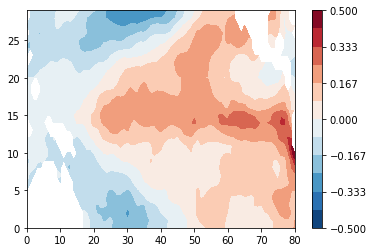

In [19]:
plt.contourf(MAM_data_m,cmap="RdBu_r",levels= np.linspace(-0.5,0.5,13))
plt.colorbar()

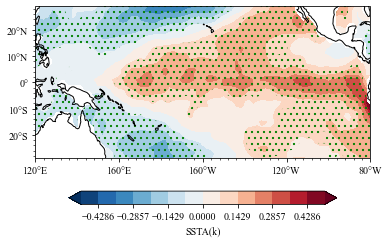

In [25]:
from cartopy.mpl.ticker import LongitudeFormatter, LatitudeFormatter
import cartopy.crs as ccrs
from matplotlib.ticker import MultipleLocator

x = sstas.lon
y = sstas.lat
fig = plt.figure()
ax = fig.add_subplot(111, projection=ccrs.PlateCarree(central_longitude=180))
m = ax.contourf(x, y, MAM_data_m, cmap="RdBu_r", transform=ccrs.PlateCarree(),levels=np.linspace(-0.5,0.5,15),extend="both")
cb = plt.colorbar(m, orientation="horizontal", shrink=0.8)
cb.set_label("SSTA(k)")
ax.coastlines()
ax.set_aspect("auto")
xticks = np.arange(120, 281, 40)
yticks = np.arange(-30, 30, 10)
ax.set_xticks(xticks, crs=ccrs.PlateCarree())
ax.set_yticks(yticks, crs=ccrs.PlateCarree())
ax.yaxis.set_major_formatter(LatitudeFormatter())
ax.xaxis.set_major_formatter(LongitudeFormatter())
smallx = 4
smally = 2
ax.xaxis.set_minor_locator(MultipleLocator(smallx))
ax.yaxis.set_minor_locator(MultipleLocator(smally))
# res = ax.contourf(x,
#            y,
#            lin.p_value,
#            levels=[0, 0.05, 1],
#         #    zorder=1, # 优先级 
#            hatches=["..", None],
#            colors="None",
#            transform=ccrs.PlateCarree()) #

# for collection in res.collections:
#     collection.set_linewidth(0.)
#     collection.set_edgecolor("green")
import sacpy.Map # 
ax.sig_plot(x,y,MAM_data_p,thrshd=0.05,marker="..",color="green")